# Downloading Libs and Testing That They Are Working


In [1]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
import tweepy # https://github.com/tweepy/tweepy
import TwitterSearch # https://github.com/ckoepp/TwitterSearch
import unidecode # https://pypi.python.org/pypi/Unidecode
import langdetect # https://pypi.python.org/pypi/langdetect
import langid # https://github.com/saffsd/langid.py
import gensim # https://radimrehurek.com/gensim/install.html

In [2]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\Users\Hesham.DESKTOP-09Q
[nltk_data]     SUFK\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

# Text Analysis Using nltk.text

In [3]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [4]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
tokens[:5]

['two', 'plus', 'two', 'is', 'four']

In [5]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK `Text` instances can be used when reading text from a file. For instance:
```python
f = open('my-file.txt','rU') # Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"
raw = f.read()
```

In [6]:
t.concordance('uckers') # concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
# concordance() is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.

Displaying 1 of 1 matches:
 girl in the park , that girl is an uckers . when the thing went quack quack q


In [7]:
t.collocations() # def collocations(self, num=20, window_size=2). num is the max no. of collocations to print.

hold tight; quack quack


In [8]:
t.count('quack')

3

In [9]:
t.index('two')

0

In [10]:
t.similar('brother') # similar(self, word, num=20). Distributional similarity: find other words which appear in the same contexts as the specified word; list most similar words first.

guy


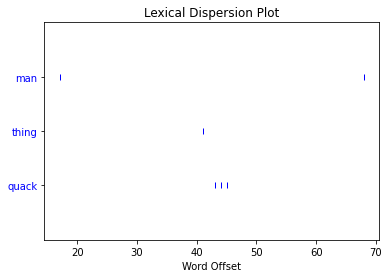

In [11]:
t.dispersion_plot(['man', 'thing', 'quack']) # Reveals patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.

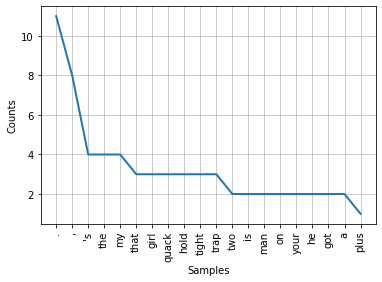

In [12]:
t.plot(20) # plots 20 most common tokens

In [13]:
t.vocab()

FreqDist({'.': 11, ',': 8, "'s": 4, 'the': 4, 'my': 4, 'that': 3, 'girl': 3, 'quack': 3, 'hold': 3, 'tight': 3, ...})

Another thing that might be useful in analysis is finding common contexts. Our text is too small so we will use a bigger one.

NLTK comes with several interesting **corpora**, which are large collections of text. You can check out what kinds of corpora are found in `nltk.corpus` in Section 1 [here](http://www.nltk.org/book/ch02.html).

`reuters` is a corpus of news documents. More specifically, `reuters` is a *corpus reader* for the Reuters corpus which provides us with methods to access the corpus:

In [14]:
from nltk.corpus import reuters
text = Text(reuters.words()) # .words() is one method corpus readers provide for reading data from a corpus. We will learn more about these methods in Chapter 2.
text.common_contexts(['August', 'June']) # It seems that .common_contexts() takes 2 words which are used similarly and displays where they are used similarly. It also seems that '_' indicates where the words would be in the text.

in_1986 in_, in_. in_1985 begins_1 last_. in_and last_, since_1985
and_and in_1987 since_1984 of_. for_shipment and_, ,_, -_) last_to
in_last by_.


We will further explore the Reuters corpus as well as several others in later chapters.

# Dealing with text files

In [15]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import special
from nltk import *
from nltk.corpus import stopwords

# This helps matlabplot and jupyter cooperate in showing graphics
%matplotlib inline

# Open Walden and read it (hence the 'r') into the variable 'file'
file = open( r"C:\Users\Hesham.DESKTOP-09QSUFK\Downloads\Scientific method.txt")

In [16]:
# Read the Walden file into the variable 'text'
walden_raw   = file.read()

# Tokenize 'text' with the NLTK function word_tokenize() and save the result to the variable 'tokens'
tokens = word_tokenize( walden_raw )

# Print the result of the tokenization
print( tokens )

# Close the Walden text file to release it from memory
# We don't need the original text anymore.
file.close()

['Scientific', 'research', 'involves', 'using', 'the', 'scientific', 'method', ',', 'which', 'seeks', 'to', 'objectively', 'explain', 'the', 'events', 'of', 'nature', 'in', 'a', 'reproducible', 'way', '.', 'An', 'explanatory', 'thought', 'experiment', 'or', 'hypothesis', 'is', 'put', 'forward', 'as', 'explanation', 'using', 'principles', 'such', 'as', 'parsimony', '(', 'also', 'known', 'as', '``', 'Occam', "'s", 'Razor', "''", ')', 'and', 'are', 'generally', 'expected', 'to', 'seek', 'consilience', 'â€', '“', 'fitting', 'well', 'with', 'other', 'accepted', 'facts', 'related', 'to', 'the', 'phenomena', '.', 'This', 'new', 'explanation', 'is', 'used', 'to', 'make', 'falsifiable', 'predictions', 'that', 'are', 'testable', 'by', 'experiment', 'or', 'observation', '.', 'The', 'predictions', 'are', 'to', 'be', 'posted', 'before', 'a', 'confirming', 'experiment', 'or', 'observation', 'is', 'sought', ',', 'as', 'proof', 'that', 'no', 'tampering', 'has', 'occurred', '.', 'Disproof', 'of', 'a', 

In [17]:
##################################################
## Find tokens with characters that are not A-Z ##
##################################################

# Compare each token in Walden to the alphabet, returning when the token includes non-alphabetical characters
notalpha = [ token for token in tokens if not token.isalpha() ]

# Count the frequency of each token.
# Answers the question, How many times does each token appear across the corpus?
# Save the result to the 'freqs' variable
freqs = FreqDist(notalpha)

# Print the 100 most frequent tokens with non-alphabetical characters
print( freqs.most_common(100) )

[(',', 22), ('.', 17), ('(', 4), (')', 4), ('``', 1), ("'s", 1), ("''", 1), ('â€', 1), ('“', 1), ('self-consistent', 1), (';', 1), ('double-check', 1)]


In [18]:
####################################################
## Remove tokens with characters that are not A-Z ##
####################################################

# Read the list of tokens and only return each token if it's all alphabetical
# We write the result to a new variable, tokens_clean, which we will overwrite until it's cleaned.
tokens_clean = [ token for token in tokens if token.isalpha() ]

In [19]:
#################################
## Convert tokens to lowercase ##
#################################

# Use another list comprehension to save the lowercase version to tokens_clean (overwriting the original)
tokens_clean = [ token.lower() for token in tokens_clean ]

# Print the result
print( tokens_clean )

['scientific', 'research', 'involves', 'using', 'the', 'scientific', 'method', 'which', 'seeks', 'to', 'objectively', 'explain', 'the', 'events', 'of', 'nature', 'in', 'a', 'reproducible', 'way', 'an', 'explanatory', 'thought', 'experiment', 'or', 'hypothesis', 'is', 'put', 'forward', 'as', 'explanation', 'using', 'principles', 'such', 'as', 'parsimony', 'also', 'known', 'as', 'occam', 'razor', 'and', 'are', 'generally', 'expected', 'to', 'seek', 'consilience', 'fitting', 'well', 'with', 'other', 'accepted', 'facts', 'related', 'to', 'the', 'phenomena', 'this', 'new', 'explanation', 'is', 'used', 'to', 'make', 'falsifiable', 'predictions', 'that', 'are', 'testable', 'by', 'experiment', 'or', 'observation', 'the', 'predictions', 'are', 'to', 'be', 'posted', 'before', 'a', 'confirming', 'experiment', 'or', 'observation', 'is', 'sought', 'as', 'proof', 'that', 'no', 'tampering', 'has', 'occurred', 'disproof', 'of', 'a', 'prediction', 'is', 'evidence', 'of', 'progress', 'this', 'is', 'done

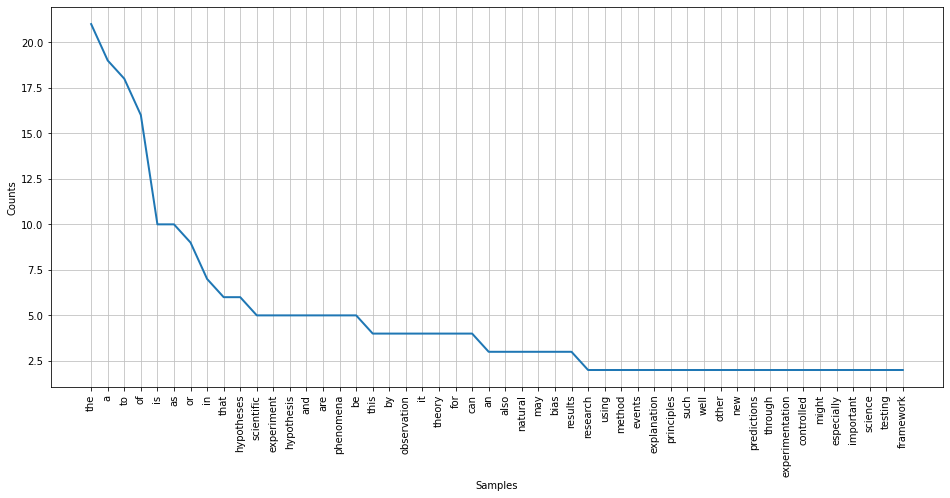

[('the', 21),
 ('a', 19),
 ('to', 18),
 ('of', 16),
 ('is', 10),
 ('as', 10),
 ('or', 9),
 ('in', 7),
 ('that', 6),
 ('hypotheses', 6),
 ('scientific', 5),
 ('experiment', 5),
 ('hypothesis', 5),
 ('and', 5),
 ('are', 5),
 ('phenomena', 5),
 ('be', 5),
 ('this', 4),
 ('by', 4),
 ('observation', 4),
 ('it', 4),
 ('theory', 4),
 ('for', 4),
 ('can', 4),
 ('an', 3),
 ('also', 3),
 ('natural', 3),
 ('may', 3),
 ('bias', 3),
 ('results', 3),
 ('research', 2),
 ('using', 2),
 ('method', 2),
 ('events', 2),
 ('explanation', 2),
 ('principles', 2),
 ('such', 2),
 ('well', 2),
 ('other', 2),
 ('new', 2),
 ('predictions', 2),
 ('through', 2),
 ('experimentation', 2),
 ('controlled', 2),
 ('might', 2),
 ('especially', 2),
 ('important', 2),
 ('science', 2),
 ('testing', 2),
 ('framework', 2)]

In [20]:
#############################################
## Generate a token frequency distribution ##
#############################################

# This line specifies the size of the figure as out Jupyter Notebook will print it
plt.rcParams["figure.figsize"] = [16,7]

# Calculate the frequency for each token from the book and save it to the variable 'frequencies'
frequencies = FreqDist( tokens_clean )

# Call 'frequencies' with the method 'plot' to generate a frequency plot of the 50 most frequent words
walden_plot = frequencies.plot( 50 )

# The line above saves the plot to the variable 'walden_plot'. This line outputs it, so it will appear below.
walden_plot

# Also print the raw list
frequencies.most_common(50)

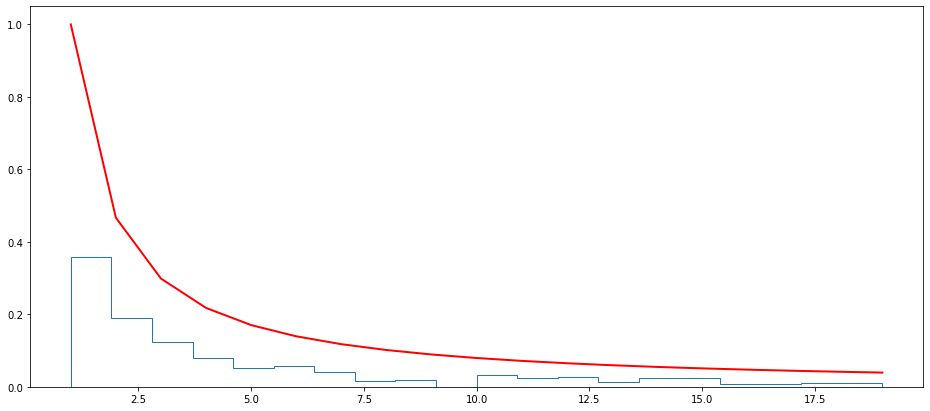

In [21]:
##################################
## Generate a Zipf distribution ##
##################################

# We will randomly draw 1000 samples from the Zipf distribution with the parameter 'a'
a = 1.1
s = np.random.zipf(a, 1000)

# Truncate at x=20 and plot the density of the distribution
# This is because most of the 'action' in this distribution is closer to zero
count, bins, ignored = plt.hist(s[s<20], 20, histtype = 'step', fill = None, density=True)

# This is how we 'bin' our random terms between 1 and 20, so we can count the frequency of spans over the number line.
x = np.arange(1., 20.)

# We want to compare the Zipf samples to the the zeta function, which is like the Zipf distribution.
y = x**(-a) / special.zetac(a)

# Plot our frequency distribution
plt.plot(x, y/max(y), linewidth=2, color='r')

# Show the plot
plt.show()

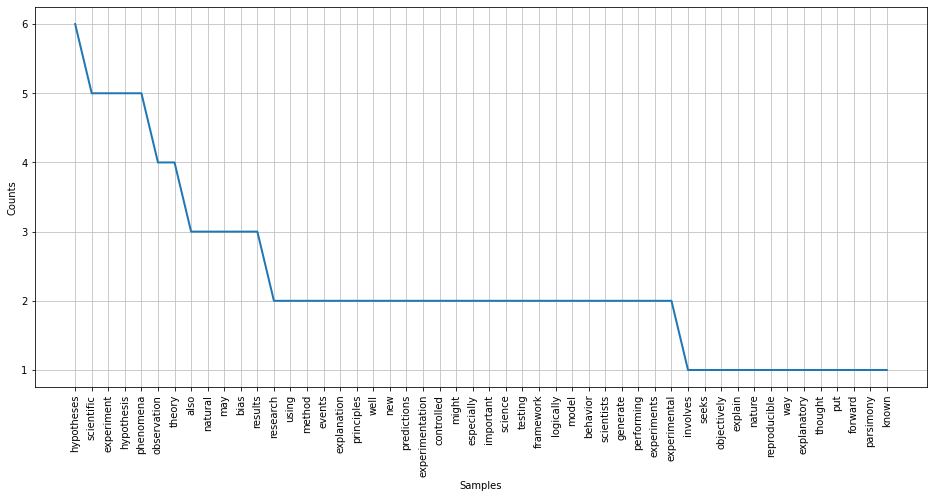

[('hypotheses', 6),
 ('scientific', 5),
 ('experiment', 5),
 ('hypothesis', 5),
 ('phenomena', 5),
 ('observation', 4),
 ('theory', 4),
 ('also', 3),
 ('natural', 3),
 ('may', 3),
 ('bias', 3),
 ('results', 3),
 ('research', 2),
 ('using', 2),
 ('method', 2),
 ('events', 2),
 ('explanation', 2),
 ('principles', 2),
 ('well', 2),
 ('new', 2),
 ('predictions', 2),
 ('experimentation', 2),
 ('controlled', 2),
 ('might', 2),
 ('especially', 2),
 ('important', 2),
 ('science', 2),
 ('testing', 2),
 ('framework', 2),
 ('logically', 2),
 ('model', 2),
 ('behavior', 2),
 ('scientists', 2),
 ('generate', 2),
 ('performing', 2),
 ('experiments', 2),
 ('experimental', 2),
 ('involves', 1),
 ('seeks', 1),
 ('objectively', 1),
 ('explain', 1),
 ('nature', 1),
 ('reproducible', 1),
 ('way', 1),
 ('explanatory', 1),
 ('thought', 1),
 ('put', 1),
 ('forward', 1),
 ('parsimony', 1),
 ('known', 1)]

In [22]:
######################
## Remove stopwords ##
######################

# Check every token in 'tokens_clean' against the NLTK stopword list
# Only keep tokens NOT in the list
tokens_clean = [t for t in tokens_clean if not t in set(stopwords.words('english'))]

# Generate a new frequency distribution plot with the 50 most frequent words remaining after filtering
# This follows the same steps as before: We count the frequency of each token, we generate a plot of the top 50, and then we display them.
frequencies = FreqDist( tokens_clean )

# Make plot with top 50 tokens
walden_plot = frequencies.plot( 50 )

# Show the plot
walden_plot

# Also print the raw list
frequencies.most_common(50)